In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
pac_12_defense = pd.read_csv("/home/blair/cognixia_workspace/CFB_Statistics/CFB_Stats/Pac-12 Defense.csv")
pac_12_defense.head()

,Player,Team,Int,Yds,Avg,Lg,TD,Solo,Ast,Tot,Sack,YdsL,Stat Type
0,Jaylinn Hawkins,CAL,6,39,6.50,29,0,25,8,33,0.0,0.0,Defense
1,Jevon Holland,ORE,5,8,1.60,6,0,31,11,42,0.0,0.0,Defense
2,Paulson Adebo,STAN,4,45,11.25,43,0,44,19,63,0.0,0.0,Defense
3,Ashtyn Davis,CAL,4,59,14.75,35t,1,37,18,55,0.0,0.0,Defense
4,Byron Murphy,WASH,4,78,19.50,66t,1,37,21,58,0.0,0.0,Defense


In [3]:
conference = 'Pac-12'
pac_12_defense['Conference'] = conference
pac_12_defense.to_csv('Pac-12_cleaned.csv', index=False)
pac_12_defense.head()

,Player,Team,Int,Yds,Avg,Lg,TD,Solo,Ast,Tot,Sack,YdsL,Stat Type,Conference
0,Jaylinn Hawkins,CAL,6,39,6.50,29,0,25,8,33,0.0,0.0,Defense,Pac-12
1,Jevon Holland,ORE,5,8,1.60,6,0,31,11,42,0.0,0.0,Defense,Pac-12
2,Paulson Adebo,STAN,4,45,11.25,43,0,44,19,63,0.0,0.0,Defense,Pac-12
3,Ashtyn Davis,CAL,4,59,14.75,35t,1,37,18,55,0.0,0.0,Defense,Pac-12
4,Byron Murphy,WASH,4,78,19.50,66t,1,37,21,58,0.0,0.0,Defense,Pac-12


In [4]:
sec_defense = pd.read_csv("/home/blair/cognixia_workspace/CFB_Statistics/CFB_Stats/SEC Defense.csv")
sec_defense.head()

,Player,Team,Int,Yds,Avg,Lg,TD,Solo,Ast,Tot,Sack,YdsL,Stat Type
0,Grant Delpit,LSU,5,1,0.20,1,0,46,28,74,5.0,44.0,Defense
1,Joejuan Williams,VAN,4,8,2.00,8,0,48,13,61,0.0,0.0,Defense
2,Chauncey Gardner-Johnson,FLA,4,110,27.50,53,2,37,34,71,3.0,10.0,Defense
3,Ryan Pulley,ARK,3,0,0.00,0,0,30,7,37,1.0,5.0,Defense
4,Cam Hilton,MIZZ,3,2,0.67,2,0,26,5,31,1.0,3.0,Defense


In [5]:
conference = 'SEC'
sec_defense['Conference'] = conference
sec_defense.to_csv('SEC_cleaned.csv', index=False)
sec_defense.head()

,Player,Team,Int,Yds,Avg,Lg,TD,Solo,Ast,Tot,Sack,YdsL,Stat Type,Conference
0,Grant Delpit,LSU,5,1,0.20,1,0,46,28,74,5.0,44.0,Defense,SEC
1,Joejuan Williams,VAN,4,8,2.00,8,0,48,13,61,0.0,0.0,Defense,SEC
2,Chauncey Gardner-Johnson,FLA,4,110,27.50,53,2,37,34,71,3.0,10.0,Defense,SEC
3,Ryan Pulley,ARK,3,0,0.00,0,0,30,7,37,1.0,5.0,Defense,SEC
4,Cam Hilton,MIZZ,3,2,0.67,2,0,26,5,31,1.0,3.0,Defense,SEC


In [6]:
pac12_sec_merged = pac12.merge(sec, how='outer')
pac12_sec_merged

NameError: name 'pac12' is not defined

In [ ]:
pac12_and_sec_na_values = sec.isna().sum()

pac12_and_sec_na_values

Player        0
Team          0
Int           0
Yds           0
Avg           0
Lg            0
TD            0
Solo          0
Ast           0
Tot           0
Sack          0
YdsL          0
Stat Type     0
Conference    0
dtype: int64

In [ ]:
pac_12 = (pd.DataFrame(pac_12_defense, columns=['Player', 'Tot', 'Conference']))
sec = (pd.DataFrame(sec_defense, columns=['Player', 'Tot', 'Conference']))
pac_12.head(10), sec.head(10)

(              Player  Tot Conference
 0    Jaylinn Hawkins   33     Pac-12
 1      Jevon Holland   42     Pac-12
 2      Paulson Adebo   63     Pac-12
 3       Ashtyn Davis   55     Pac-12
 4       Byron Murphy   58     Pac-12
 5  Deommodore Lenoir   52     Pac-12
 6        Chase Lucas   62     Pac-12
 7       Traveon Beck   32     Pac-12
 8      Darnay Holmes   48     Pac-12
 9  Scottie Young Jr.   38     Pac-12,
                      Player  Tot Conference
 0              Grant Delpit   74        SEC
 1          Joejuan Williams   61        SEC
 2  Chauncey Gardner-Johnson   71        SEC
 3               Ryan Pulley   37        SEC
 4                Cam Hilton   31        SEC
 5              Frank Coppet   30        SEC
 6             Rashad Fenton   34        SEC
 7               John Battle   39        SEC
 8            Bryce Thompson   34        SEC
 9               Darius West   86        SEC)

In [ ]:
pac_12_ints = (pd.DataFrame(pac_12_defense, columns=['Player', 'Int', 'Team', 'Conference']))
sec_ints = (pd.DataFrame(sec_defense, columns=['Player', 'Int', 'Team', 'Conference']))
pac_12_ints.head(10), sec.head(10)

(              Player  Int  Team Conference
 0    Jaylinn Hawkins    6   CAL     Pac-12
 1      Jevon Holland    5   ORE     Pac-12
 2      Paulson Adebo    4  STAN     Pac-12
 3       Ashtyn Davis    4   CAL     Pac-12
 4       Byron Murphy    4  WASH     Pac-12
 5  Deommodore Lenoir    3   ORE     Pac-12
 6        Chase Lucas    3  AZST     Pac-12
 7       Traveon Beck    3   CAL     Pac-12
 8      Darnay Holmes    3  UCLA     Pac-12
 9  Scottie Young Jr.    3  ARIZ     Pac-12,
                      Player  Tot Conference
 0              Grant Delpit   74        SEC
 1          Joejuan Williams   61        SEC
 2  Chauncey Gardner-Johnson   71        SEC
 3               Ryan Pulley   37        SEC
 4                Cam Hilton   31        SEC
 5              Frank Coppet   30        SEC
 6             Rashad Fenton   34        SEC
 7               John Battle   39        SEC
 8            Bryce Thompson   34        SEC
 9               Darius West   86        SEC)

In [ ]:
pac_12_tackles = pac_12.groupby(['Tot'], group_keys=False).apply(lambda tackles: tackles)
pac_12_most_tackles = pac_12_tackles.sort_values(by=['Tot'], ascending=False).head()
pac_12_most_tackles


,Player,Tot,Conference
22,Ben Burr-Kirven,176,Pac-12
28,Evan Weaver,156,Pac-12
58,Jordan Kunaszyk,147,Pac-12
25,Adarius Pickett,123,Pac-12
29,Colin Schooler,119,Pac-12


In [ ]:
pac_12_ints_group = pac_12_ints.groupby(['Int'], group_keys=False).apply(lambda interceptions: interceptions)
pac_12_most_ints = pac_12_ints_group.sort_values(by=['Int'], ascending=False).head()
pac_12_most_ints

,Player,Int,Team,Conference
0,Jaylinn Hawkins,6,CAL,Pac-12
1,Jevon Holland,5,ORE,Pac-12
2,Paulson Adebo,4,STAN,Pac-12
3,Ashtyn Davis,4,CAL,Pac-12
4,Byron Murphy,4,WASH,Pac-12


In [ ]:
sec_tackles = sec.groupby(['Tot'], group_keys=False).apply(lambda tackles: tackles)
sec_most_tackles = sec_tackles.sort_values(by=['Tot'], ascending=False).head()
sec_most_tackles

,Player,Tot,Conference
69,Jordan Griffin,119,SEC
24,Johnathan Abram,99,SEC
17,Erroll Thompson,87,SEC
87,Jacob Phillips,87,SEC
9,Darius West,86,SEC


In [ ]:
sec_ints_group = sec_ints.groupby(['Int'], group_keys=False).apply(lambda interceptions: interceptions)
sec_most_ints = sec_ints_group.sort_values(by=['Int'], ascending=False).head()
sec_most_ints

,Player,Int,Team,Conference
0,Grant Delpit,5,LSU,SEC
2,Chauncey Gardner-Johnson,4,FLA,SEC
1,Joejuan Williams,4,VAN,SEC
3,Ryan Pulley,3,ARK,SEC
5,Frank Coppet,3,VAN,SEC


In [ ]:
defense_tackles = pd.concat([pac_12_most_tackles, sec_most_tackles])
pac_sec_tackles = defense_tackles.groupby(['Tot'], group_keys=False).apply(lambda tackles: tackles)
pac_sec_tackles

,Player,Tot,Conference
22,Ben Burr-Kirven,176,Pac-12
28,Evan Weaver,156,Pac-12
58,Jordan Kunaszyk,147,Pac-12
25,Adarius Pickett,123,Pac-12
29,Colin Schooler,119,Pac-12
69,Jordan Griffin,119,SEC
24,Johnathan Abram,99,SEC
17,Erroll Thompson,87,SEC
87,Jacob Phillips,87,SEC
9,Darius West,86,SEC


In [ ]:
defense_ints = pd.concat([pac_12_most_ints, sec_most_ints])
pac_sec_ints = defense_ints.groupby(['Int'], group_keys=False).apply(lambda interceptions: interceptions)
pac_sec_ints

,Player,Int,Team,Conference
0,Grant Delpit,5,LSU,SEC
0,Jaylinn Hawkins,6,CAL,Pac-12
1,Joejuan Williams,4,VAN,SEC
1,Jevon Holland,5,ORE,Pac-12
2,Paulson Adebo,4,STAN,Pac-12
2,Chauncey Gardner-Johnson,4,FLA,SEC
3,Ryan Pulley,3,ARK,SEC
3,Ashtyn Davis,4,CAL,Pac-12
4,Byron Murphy,4,WASH,Pac-12
5,Frank Coppet,3,VAN,SEC


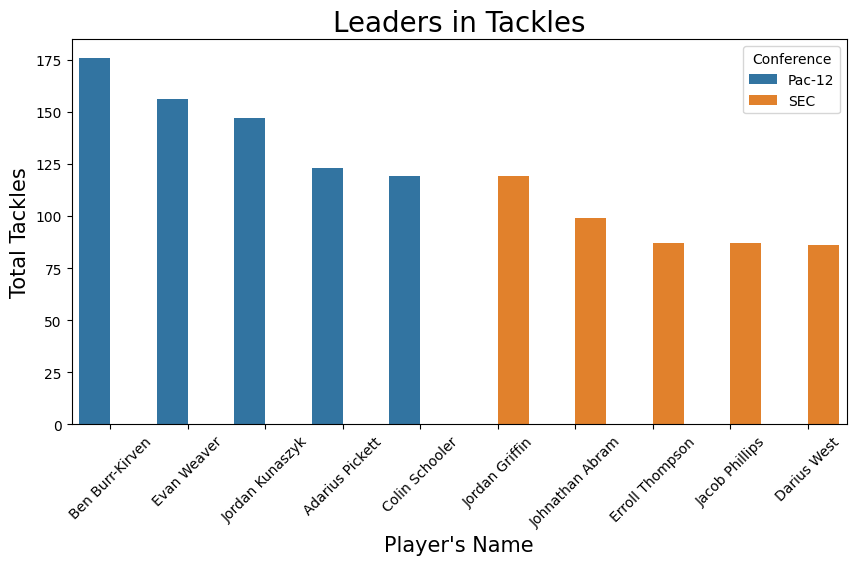

In [ ]:
ax = sns.barplot(data=defense_tackles , x='Player', y='Tot', hue='Conference')
ax.figure.set_size_inches(10, 5)
plt.title('Leaders in Tackles', size=20)
plt.xticks(rotation=45)
plt.xlabel('Player\'s Name', size=15)
plt.ylabel('Total Tackles', size=15)
plt.show()

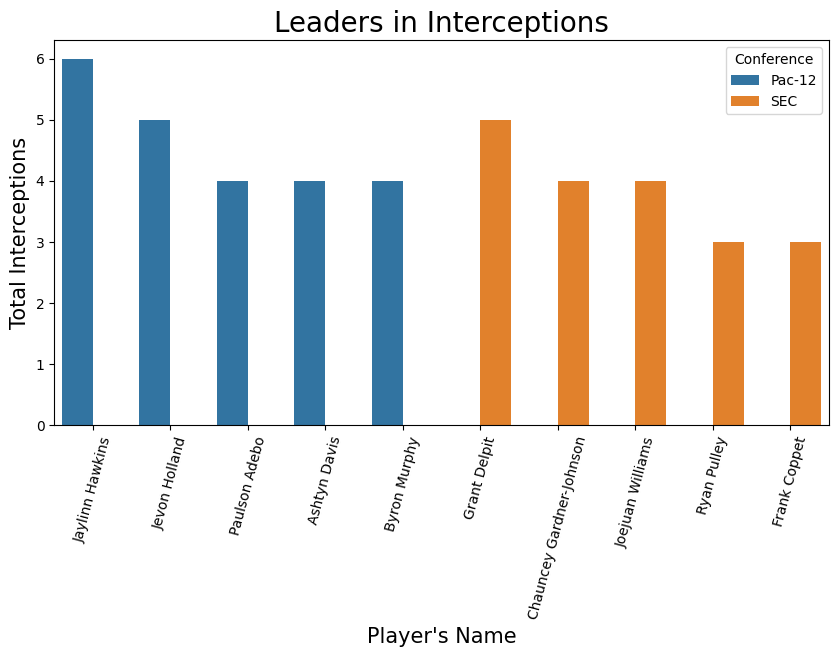

In [ ]:
ax = sns.barplot(data=defense_ints , x='Player', y='Int', hue='Conference')
ax.figure.set_size_inches(10, 5)
plt.title('Leaders in Interceptions', size=20)
plt.xticks(rotation=75)
plt.xlabel('Player\'s Name', size=15)
plt.ylabel('Total Interceptions', size=15)
plt.show()

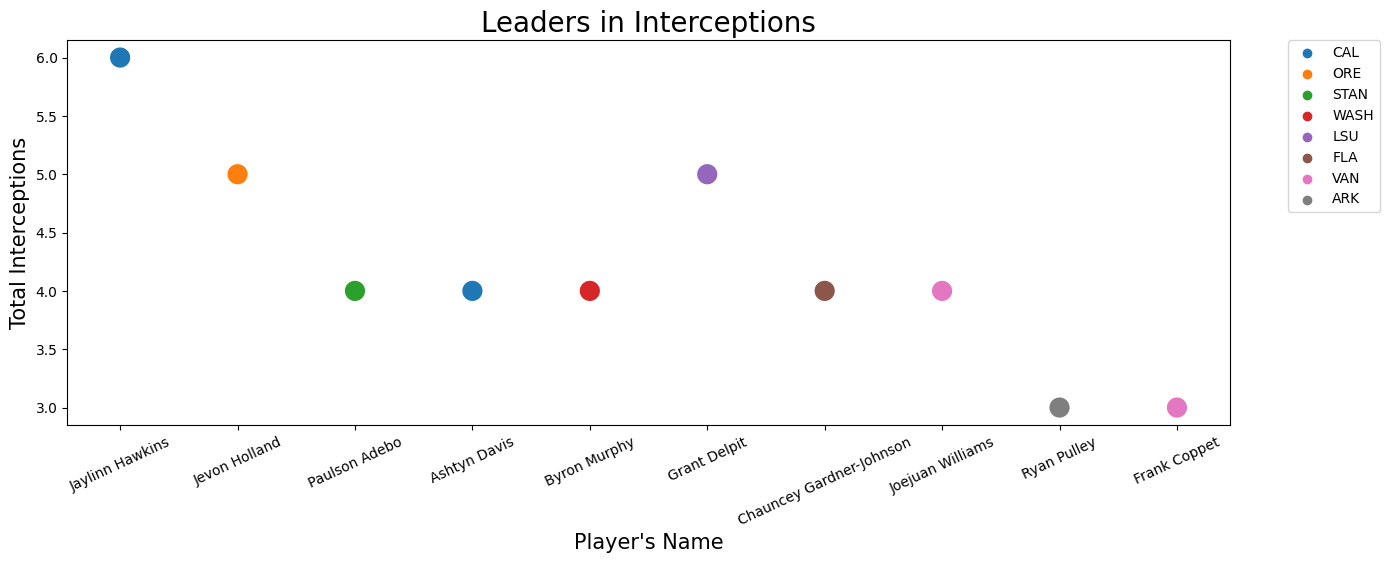

In [ ]:
ax = sns.scatterplot(data=defense_ints, x='Player', y='Int', hue='Team', s=250)
ax.figure.set_size_inches(15, 5)
plt.title('Leaders in Interceptions', size=20)
plt.xticks(rotation=25)
plt.xlabel('Player\'s Name', size=15)
plt.ylabel('Total Interceptions', size=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()